# Programming Assignment II: Explainability

In this assignment you will train machine learning models and experiment with techniques discussed in the lectures.
This assignment makes use of existing Python libraries for some questions. We have provided links to tutorials/examples if you're not familiar with them yet.

All code that you implement should be in this notebook. You should submit:
* This notebook with your code added. Make sure to add enough documentation. Also provide complete answers to the more theoretical questions in this notebook. These questions are followed by an 'answer indent':
> Answer:

The notebook .ipynb should have the name format `Prog_Explainability_Group_X.ipynb`, where X is your programming group ID.

Important notes:
* Deadline for this assignment is **Friday, May 30, 17:00**.
* Send it to both Maria Muratidi (m.mouratidi@uu.nl) and Heysem Kaya (h.kaya@uu.nl), CCing your programming partner.
* Title of the email: [INFOMHCML] Explainability programming assignment submission [X], with X the number of your group.
* There will be a lab session to assist you with the assignment on **Tuesday, May 27, between 11:00-12:45 at DALTON 500 - 6.27 and DALTON 500 - 8.27**.

#### Name and student numbers
Bar Melinarskiy - 2482975

Julia Baas - 6082826

**Group number**: 10

### Installation

For this assignment, we are going to use the following Python packages:
graphviz, matplotlib, pandas, statsmodels, openpyxl, interpret, and scikit-learn.

In [1]:
# Installing packages
!pip install graphviz
!pip install matplotlib pandas statsmodels openpyxl
!pip install interpret
!pip install scikit-learn --upgrade

### Read the data
We are going to use the ChaLearn LAP-FI (First Impressions) Dataset. This dataset contains 10.000 data points, which correspond to videos collected from YouTube and annotated via Amazon Mechanical Turk for the BIG-5 personality impressions: openness, extraversion, conscientiousness, neuroticism, agreeableness.

These five personality impression scores will be used as features to predict the outcome variable: a job interview invitation.

For a detailed description, see the [paper of the dataset](https://ieeexplore.ieee.org/abstract/document/7966041?casa_token=1Y03H5ykCqsAAAAA:VLhCcjAgByJ2hTdKhulmIUiXIVepEJfFyB7HM0XVts7bN8Gi8wMsiTT0qZ--I_kq8wiUHIpPN7es).


1.   If you use Google Colab, upload 'all_df.csv' (you can find this file on blackboard) through the upload button in the Files tab.
  - Copy the path of the file;
  - Run the cell below with your path. This will ask you for permission to access your Google Drive files and then you can access the data.
2.   If you are running this notebook at your own machine (jupyter notebook), locate the 'all_df.csv' file in the same folder this notebook exists. Then you can run the second cell below.

   



In [2]:
def is_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False
    
if is_colab():
    # Run this cell only if you use Google Colab
    from google.colab import drive
    drive.mount('/content/gdrive')

    # Make sure you uploaded all_df.csv to your Google Drive and change the path
    # to the directory it is located in (usually in content/gdrive/MyDrive/...)
    %cd  '/content/gdrive/MyDrive/HCML/Explainability'

In [3]:
# Run this cell (both when working locally or with Google Colab)
import pandas as pd
import numpy as np

data = pd.read_csv("all_df.csv")
print("Data loaded")
np.random.seed(42)  # For reproducibility

Data loaded


### Loading and preprocessing the data
There are 6000, 2000 and 2000 examples for training, validation/development and test set respectively. In the data this is indicated by the feature `split`.

The training set is used to train models, the validation/development set to optimize the models hyper-parameters, and the test set to evaluate the trained model.

In [4]:
import numpy as np

# global variables
FEATURE_NAMES = ['extraversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'openness']
LABEL_NAME = 'interview'

def load_data():
    def split_feature_label(data_set):
        features = data_set[FEATURE_NAMES]
        labels = data_set[LABEL_NAME]
        return features, labels

    train_set = data[data['split'] == 'training']
    val_set = data[data['split'] == 'validation']
    test_set = data[data['split'] == 'test']

    train_features, train_labels = split_feature_label(train_set)
    val_features, val_labels = split_feature_label(val_set)
    test_features, test_labels = split_feature_label(test_set)

    return train_features, train_labels, val_features, \
        val_labels, test_features, test_labels

# Load the data with the function above
(train_features, train_labels, dev_features, \
        dev_labels, test_features, test_labels) = load_data()

### check the data

In [5]:
from IPython.display import display, HTML

# Show the DataFrame in a scrollable box (adjust height as needed)
print("Train features:")
display(HTML(train_features.to_html(max_rows=10, 
                                    max_cols=100, 
                                    notebook=True,
                                    show_dimensions=True,
                                    justify='center', 
                                    border=1, 
                                    table_id="scroll_df")))
print("Train labels:")
display(HTML(train_labels.to_frame().to_html(max_rows=10, 
                                              max_cols=100, 
                                              notebook=True,
                                              show_dimensions=True,
                                              justify='center', 
                                              border=1, 
                                              table_id="scroll_df")))

Train features:


,extraversion,neuroticism,agreeableness,conscientiousness,openness
0,0.523364,0.552083,0.626374,0.601942,0.488889
1,0.345794,0.375000,0.472527,0.582524,0.366667
2,0.252336,0.291667,0.406593,0.485437,0.511111
3,0.457944,0.489583,0.505495,0.398058,0.377778
4,0.607477,0.489583,0.406593,0.621359,0.622222
...,...,...,...,...,...
5995,0.523364,0.479167,0.626374,0.621359,0.544444
5996,0.728972,0.760417,0.582418,0.524272,0.822222
5997,0.700935,0.770833,0.747253,0.699029,0.788889
5998,0.317757,0.531250,0.582418,0.679612,0.588889


Train labels:


,interview
0,0.504673
1,0.457944
2,0.373832
3,0.457944
4,0.570093
...,...
5995,0.588785
5996,0.616822
5997,0.691589
5998,0.616822


# Part 1. Different models

### **1. Linear Regression**

Train a linear regression model (we recommend the `statsmodels.api` package with the ordinary least squares model `sm`).

Hint: to get a linear regression model, you should manually add a constant variable (usually called bias or intercept - that has a fixed value of 1 for all instances) to the data, either by adding it column yourself or by using the `add_constant()` function.



**Q1.1**

Provide the $R^2$ (goodness of fit) statistic and for each feature (+ the bias variable), the following in tabular format:
* Weight estimate (coef)
* SE (standard error of estimates)
* T-statistic

Hint: You can print the summary of the model using `.summary()` to do this. This gives an extensive overview of the performance of a model.

In [6]:
# We recommend the statsmodels package
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


# Your code to add a bias/intercept variable
train_features_with_const = sm.add_constant(train_features)

# Fit and summarize OLS model
linear_reg_model = sm.OLS(train_labels, train_features_with_const)
linear_reg_model_res = linear_reg_model.fit() # fit the linear regression model
print(linear_reg_model_res.summary())

print("\n*********************************************************************************************")
linear_reg_test_predictions = linear_reg_model_res.predict(sm.add_constant(test_features))
linear_reg_mse = mean_squared_error(test_labels, linear_reg_test_predictions)
print("Linear Regression MSE on test: {:.4f}".format(linear_reg_mse))

                            OLS Regression Results                            
Dep. Variable:              interview   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        12:50:45   Log-Likelihood:                 10232.
No. Observations:                6000   AIC:                        -2.045e+04
Df Residuals:                    5994   BIC:                        -2.041e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0727      0.00

In [7]:
# Print the top three most important coefficients by absolute value (excluding the intercept)
linear_reg_coefficients = linear_reg_model_res.params.drop('const').abs().sort_values(ascending=False)
top3 = linear_reg_coefficients.head(3)
for i, (feature, coef) in enumerate(top3.items(), 1):
    print(f"{i}. Feature: {feature}, |Coefficient|: {coef:.3f}")

1. Feature: conscientiousness, |Coefficient|: 0.329
2. Feature: agreeableness, |Coefficient|: 0.257
3. Feature: neuroticism, |Coefficient|: 0.240


**Q1.2**

Which three features are the most important?

> Answer:

**The top three most important features (excluding the bias) are:**  
1. conscientiousness (0.329)  
2. agreeableness (0.257)  
3. neuroticism (0.24)

In [8]:
conscientiousness_coef = linear_reg_model_res.params['conscientiousness']
delta = 0.1  # increase in feature
change_in_prediction = conscientiousness_coef * delta
print(f"If 'conscientiousness' increases by 0.1, the predicted interview score changes by {change_in_prediction:.4f}")

If 'conscientiousness' increases by 0.1, the predicted interview score changes by 0.0329


**Q1.3**

How does the predicted 'interview' score change with an 0.1 increase of the 'conscientiousness' feature given that all other feature values remain the same?

> Answer:
**If 'conscientiousness' increases by 0.1, the predicted interview score changes by 0.0329**

**Q1.4**

Show bar graph illustrations of the feature effects for the first two validation set instances.

> Answer:

Instance 0 linear model feature effects:
extraversion: 0.1220
neuroticism: 0.1423
agreeableness: 0.1584
conscientiousness: 0.2110
openness: 0.0476

Instance 1 linear model feature effects:
extraversion: 0.0831
neuroticism: 0.1249
agreeableness: 0.1075
conscientiousness: 0.1886
openness: 0.0352


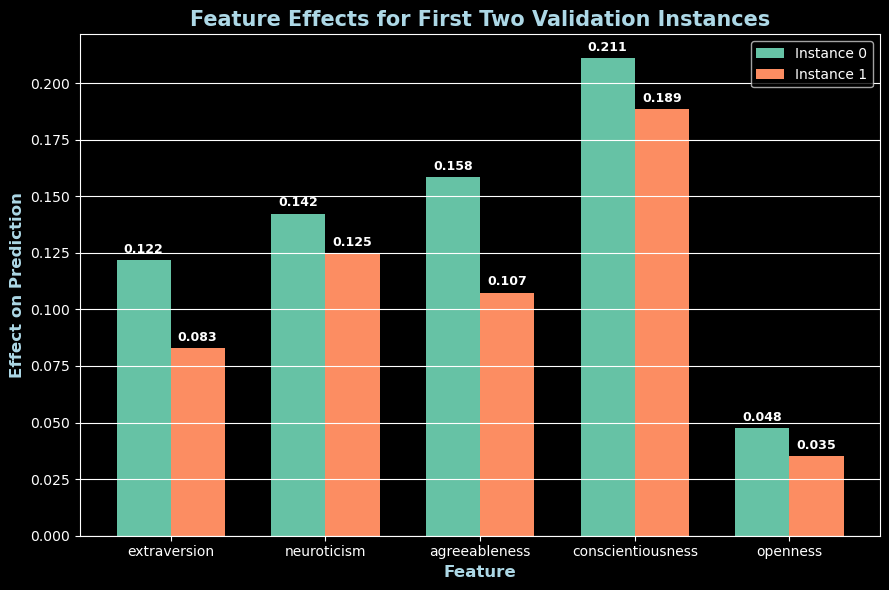

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Get coefficients (excluding intercept)
coefs = linear_reg_model_res.params.drop('const')

# Get the first two validation instances
first_two = dev_features.iloc[:2]

features = coefs.index
x = np.arange(len(features))
width = 0.35  # width of the bars

colors = plt.get_cmap('Set2').colors

# Compute effects for both instances
effects_0 = first_two.iloc[0] * coefs
effects_1 = first_two.iloc[1] * coefs

# Print feature effects for both instances
print("Instance 0 linear model feature effects:")
for feat, eff in zip(features, effects_0):
    print(f"{feat}: {eff:.4f}")

print("\nInstance 1 linear model feature effects:")
for feat, eff in zip(features, effects_1):
    print(f"{feat}: {eff:.4f}")

# Create a bar plot for the first two validation instances (single plot with two sets of bars)
fig, ax = plt.subplots(figsize=(9, 6))

bars1 = ax.bar(x - width/2, effects_0.values, width, label='Instance 0', color=colors[0])
bars2 = ax.bar(x + width/2, effects_1.values, width, label='Instance 1', color=colors[1])

ax.set_ylabel('Effect on Prediction', fontsize=12, color='lightblue', weight='bold')
ax.set_xlabel('Feature', fontsize=12, color='lightblue', weight='bold')
ax.set_title('Feature Effects for First Two Validation Instances', fontsize=15, color='lightblue', weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(features)
ax.grid(axis='y')
ax.legend()

# Add value labels on top of each bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9, weight='bold')

plt.tight_layout()
plt.show()

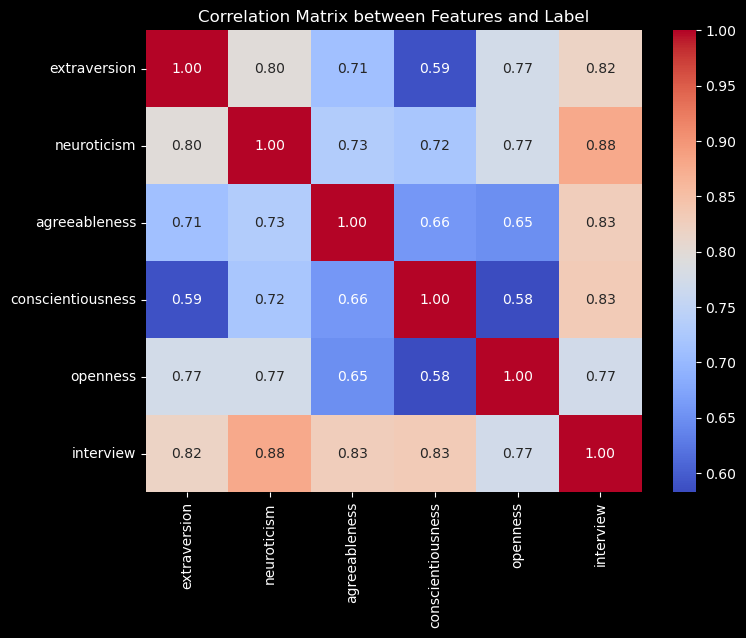

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine features and label into one DataFrame for correlation
corr_df = train_features.copy()
corr_df['interview'] = train_labels

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix between Features and Label")
plt.show()

**Q1.5**

Reflection: why would training a regression tree not work well for this dataset in terms of model interpretability? And under what conditions could the dataset be used with a decision tree to yield an interpretable model?

> Answer:

**Training a regression tree is not ideal for this dataset in terms of model interpretability. Since the output is continuous rather than binary (as in a classification tree), the resulting model tends to be more complex and deeper, making it harder to interpret. The correlation matrix displayed above shows that all five personality traits are strongly correlated with the interview outcome (correlations ≥ 0.77), and also with each other (e.g., extraversion and neuroticism: 0.80). These strong correlations increase the chance of the tree making many small, overlapping splits to reduce error, which can lead to overfitting and overly long decision paths that are difficult to understand.**

### **2. Explainable Boosting Model**
Train an Explainable Boosting Machine (EBM) with [InterpretML](https://interpret.ml/docs/ebm.html). EBM is a Generalized Additive Model (GAM) that is highly intelligible and explainable.

The `interpret` package provides both global and local explanation functions: `explain_global()` and `explain_local()` can be used to interpret a ML model.

**Q2.1**

Visualize/provide global (model-wise) feature importances for EBM as a table or figure.

In [11]:
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show
from sklearn.metrics import mean_squared_error
import pandas as pd

# Train EBM
ebm = ExplainableBoostingRegressor()
ebm.fit(train_features, train_labels)
show(ebm.explain_global())

print("\n*********************************************************************************************")
ebm_test_predictions = ebm.predict(test_features)
ebm_mse = mean_squared_error(test_labels, ebm_test_predictions)
print("Explainable Boosting Machine MSE on test: {:.4f}".format(ebm_mse))

<!-- http://127.0.0.1:7001/2030915435072/ -->


*********************************************************************************************
Explainable Boosting Machine MSE on test: 0.0020


In [12]:
import pandas as pd

global_exp = ebm.explain_global()
features = list(train_features.columns)
importances = []

for i in range(len(features)):
    # For importance, sum the absolute values of the scores
    scores = global_exp.data(i)['scores']
    importance = sum(abs(s) for s in scores)
    importances.append(importance)

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values('Importance', ascending=False)
print("\nEBM Global Feature Importances Table:")
display(HTML(importance_df.to_html(max_rows=10, 
                                              max_cols=100, 
                                              notebook=True,
                                              index=False,
                                              show_dimensions=True,
                                              justify='center', 
                                              border=1, 
                                              table_id="importance_df")))


EBM Global Feature Importances Table:


Feature,Importance
conscientiousness,7.181206
neuroticism,4.683649
agreeableness,4.298750
extraversion,3.921539
openness,1.605850


**Q2.2**

What are the most important two features in EBM? Are they the same as in the linear model?

> Answer:
**The top three most important features for EBM are:**  
1. conscientiousness (7.181)  
2. neuroticism (4.684)
3. agreeableness (4.300) 

Which are the same three features from the top three features for Linear Regression (just in a slightly different order):
1. conscientiousness (0.329)  
2. agreeableness (0.257)  
3. neuroticism (0.24)

Now, to have an idea how EBM treats the input and generates the explanation, visualize EBM local explanations on a synthetic instance generated from training set mean feature vector as input and training set mean response as output.



In [13]:
from interpret import show
 
# EBM Local explanation for training set mean vector with corresponding training set mean label
train_mean_x = pd.DataFrame(train_features.mean(axis=0)).T
train_mean_y = pd.DataFrame([train_labels.mean()])

print(train_mean_x)
print(train_mean_y)

ebm_local_exp = ebm.explain_local(train_mean_x, train_mean_y)
show(ebm_local_exp)

   extraversion  neuroticism  agreeableness  conscientiousness  openness
0      0.476146     0.520286       0.548181           0.522731  0.566281
         0
0  0.50378


<!-- http://127.0.0.1:7001/2030941810000/ -->

**Q2.3**

Now, visualize local (instance-wise) feature importances for the first two instances of the development set.

In [14]:
# EBM local explanations for the first two development set instances
from interpret import show

# Select the first two instances from the development set
first_two_dev = dev_features.iloc[:2]
first_two_labels = dev_labels.iloc[:2]

# Get local explanations for these two instances
ebm_local_exp = ebm.explain_local(first_two_dev, first_two_labels)

# Visualize in the notebook (interactive)
show(ebm_local_exp)

# If you want to print the feature contributions as a table for each instance:
for i in range(2):
    print(f"\nInstance {i+1} local explanation:")
    names = ebm_local_exp.data(i)['names']
    scores = ebm_local_exp.data(i)['scores']
    for name, score in zip(names, scores):
        print(f"{name}: {score:.4f}")

<!-- http://127.0.0.1:7001/2030943267504/ -->


Instance 1 local explanation:
extraversion: 0.0311
neuroticism: 0.0171
agreeableness: 0.0178
conscientiousness: 0.0401
openness: -0.0013
extraversion & agreeableness: 0.0002
extraversion & conscientiousness: 0.0001
neuroticism & conscientiousness: 0.0002
agreeableness & openness: 0.0001
conscientiousness & openness: 0.0002

Instance 2 local explanation:
extraversion: -0.0075
neuroticism: -0.0029
agreeableness: -0.0350
conscientiousness: 0.0174
openness: -0.0168
extraversion & agreeableness: -0.0002
extraversion & conscientiousness: 0.0000
neuroticism & conscientiousness: 0.0001
agreeableness & openness: 0.0006
conscientiousness & openness: 0.0000


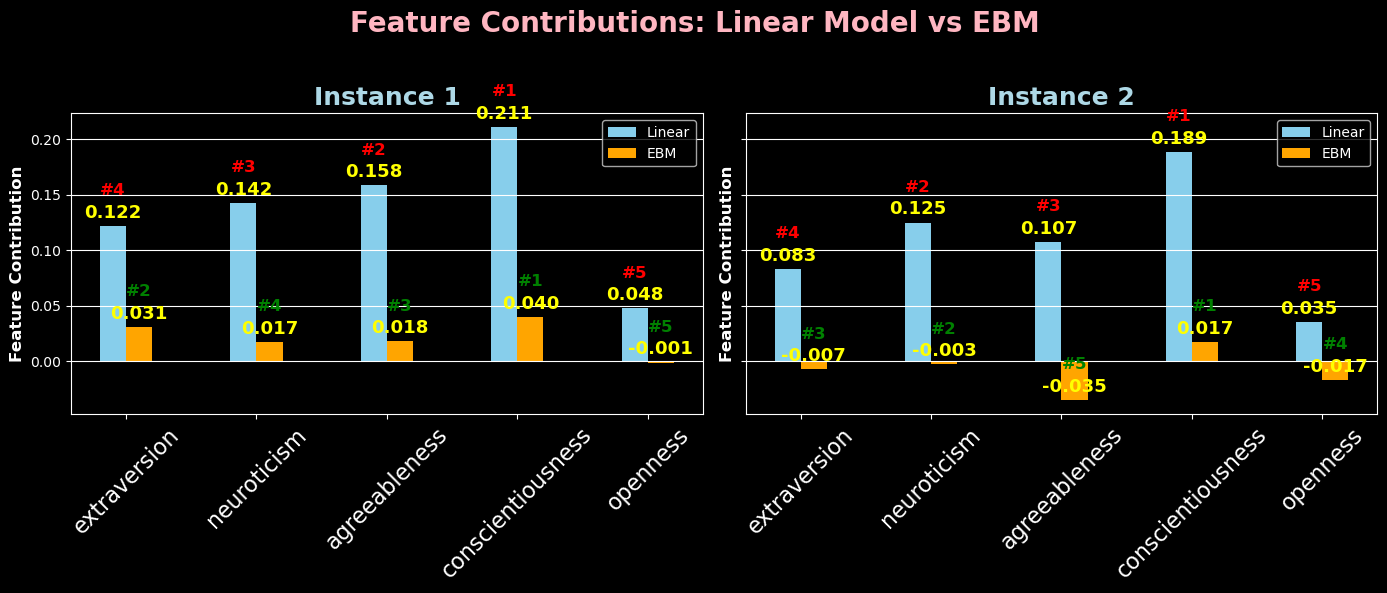

In [15]:
# EBM Local explanation for the first two validation instances
# plot to answer question 2.4

import matplotlib.pyplot as plt
import numpy as np

# --- Get linear model effects ---
coefs = linear_reg_model_res.params.drop('const')
first_two = dev_features.iloc[:2]
features = list(coefs.index)

effects_linear_0 = first_two.iloc[0] * coefs
effects_linear_1 = first_two.iloc[1] * coefs

# --- Get EBM effects ---
ebm_names_0 = ebm_local_exp.data(0)['names']
ebm_scores_0 = ebm_local_exp.data(0)['scores']
ebm_names_1 = ebm_local_exp.data(1)['names']
ebm_scores_1 = ebm_local_exp.data(1)['scores']

def filter_main_effects(names, scores):
    filtered = [(n, s) for n, s in zip(names, scores) if '&' not in n]
    return dict(filtered)

ebm_main_0 = filter_main_effects(ebm_names_0, ebm_scores_0)
ebm_main_1 = filter_main_effects(ebm_names_1, ebm_scores_1)

x = np.arange(len(features))
width = 0.2

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for idx, (effects_linear, ebm_main, instance_label) in enumerate([
    (effects_linear_0, ebm_main_0, "Instance 1"),
    (effects_linear_1, ebm_main_1, "Instance 2")
]):
    # Get values for ranking
    linear_vals = np.array([effects_linear[f] for f in features])
    ebm_vals = np.array([ebm_main.get(f, 0) for f in features])
    # Rankings (1 = highest contribution)
    linear_ranks = linear_vals.argsort()[::-1].argsort() + 1
    ebm_ranks = ebm_vals.argsort()[::-1].argsort() + 1

    bars1 = axs[idx].bar(x - width/2, linear_vals, width, label='Linear', color='skyblue')
    bars2 = axs[idx].bar(x + width/2, ebm_vals, width, label='EBM', color='orange')
    axs[idx].set_xticks(x)
    axs[idx].set_xticklabels(features, rotation=45, fontsize=16)
    axs[idx].set_title(instance_label, color='lightblue', weight='bold', fontsize=18)
    axs[idx].set_ylabel('Feature Contribution', weight='bold', fontsize=12)
    axs[idx].legend()
    axs[idx].grid(axis='y')
    # Add value and rank labels for linear regression bars
    for i, bar in enumerate(bars1):
        height = bar.get_height()
        axs[idx].annotate(f'{height:.3f}',
                          xy=(bar.get_x() + bar.get_width() / 2, height),
                          xytext=(0, 3),
                          textcoords="offset points", color='yellow',
                          ha='center', va='bottom', fontsize=13, weight='bold')
        axs[idx].annotate(f'#{linear_ranks[i]}',
                          xy=(bar.get_x() + bar.get_width() / 2, height),
                          xytext=(0, 20),
                          textcoords="offset points", color='red',
                          ha='center', va='bottom', fontsize=12, weight='bold')
        
    # Add value and rank labels for EBM bars
    for i, bar in enumerate(bars2):
        height = bar.get_height()
        axs[idx].annotate(f'{height:.3f}',
                          xy=(bar.get_x() + bar.get_width() / 2, height),
                          xytext=(0, 3),
                          textcoords="offset points", color='yellow',
                          ha='center', va='bottom', fontsize=13, weight='bold')
        axs[idx].annotate(f'#{ebm_ranks[i]}',
                          xy=(bar.get_x() + bar.get_width() / 2, height),
                          xytext=(0, 20),
                          textcoords="offset points", color='green',
                          ha='center', va='bottom', fontsize=12, weight='bold')

plt.suptitle('Feature Contributions: Linear Model vs EBM', fontsize=20, color='lightpink', weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Q2.4**

Let's compare these feature importances with the feature effects in question 1.4.

* Are the feature contribution orderings the same in both models for the two instances?
> Answer:
**No, the feature contribution orderings are not exactly the same between the two models for both instances. As shown in the figure, we included the ranking for each feature above the bars (red for linear regression, green for EBM). In the first instance, both models agree on the most and least important features (conscientiousness and openness, respectively), but they differ on the others—for example, EBM ranks extraversion second, while linear regression ranks agreeableness second. In the second instance, the models only agree on the top two features (conscientiousness and neuroticism). However, agreeableness is ranked third by linear regression but drops to fifth (and even has a negative contribution) in the EBM model. This highlights that while there is some overlap, the models do not produce identical feature importance rankings for individual cases.**

* For the second example's explanation, why do you think the contribution of *conscientiousness* is positive, while the contribution of *agreeableness* is negative? (Hint: consider the feature values relative to the training set mean values you calculated / processed in the former subquestion.)
> Answer:

**This difference arises from how EBM models each feature's effect individually, using data-driven, non-linear shape functions that capture how prediction changes as a feature value varies.**

**The positive contribution of conscientiousness suggests that the individual's score on this trait is in a region where the EBM model associates higher values with an increase in the predicted outcome.**

**In contrast, the negative contribution from agreeableness implies that the individual's value for agreeableness lies in a region of the EBM shape function where higher values contribute negatively to the prediction, or their value is lower than average and the model penalizes that.**

**Since EBM learns these effects directly from the training data, the direction and size of the contribution depend on:**
- **The location of the feature value relative to key turning points in the learned shape,**
- **Whether that value falls in an increasing or decreasing region, and**
- **The magnitude of the learned effect at that point.**

**So, although agreeableness is ranked highly by the linear model - in 3rd place, EBM captures a non-linear, potentially diminishing or reversing effect for this instance—leading to its negative influence in this case.**

# Part 2. Model-Agnostic Methods for Interpreting/Explaining NN

### **3. Training Neural Networks**
Train a one-layer Neural Network (multi-layer perceptron (MLP) Regressor, but with one layer) with the following settings:

- Activation function: ReLU
- Size of the hidden layer: 50 neurons
- Recommended optimizer/solver: Adam

For a tutorial see [Tutorial](https://scikit-learn.org/stable/modules/neural_networks_supervised.html).

**Q3.1**

Apply the trained neural network model to the development set to find the best hyperparameters (such as learning rate). Report the Root Mean Square Error (RMSE) performance measure.

**Note.** A development set RMSE below 0.045 is reasonable, then you can apply the corresponding model on the test set in the next question.

In [16]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

#changing the names so we don't get confused 
X_train = train_features
y_train = train_labels
X_val   = dev_features
y_val   = dev_labels
X_test  = test_features
y_test  = test_labels

clf = MLPRegressor(hidden_layer_sizes=(50), activation='relu', solver='adam', alpha=0.0001, batch_size=128, learning_rate_init=0.001)
clf.fit(X_train, y_train)

#predict the validation set
y_pred = clf.predict(X_val)

#evaluating:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE is {rmse}")

RMSE is 0.04379172906035631


**Q3.2**

Now use the best settings to report the Root Mean Square Error (RMSE) performance measure on the test set.

It is possible to use the combination of the training and development sets to retrain the model and report the test set performance. You can also use the model that was trained on the training set only.

In [17]:
#predict the validation set
y_pred2 = clf.predict(X_test)

#evaluating:
rmse = np.sqrt(mean_squared_error(y_test, y_pred2))
print(f"RMSE is {rmse}")

RMSE is 0.04475152094248153


Now we can analyze factors that influence the predictions. Both Partial Dependence Plots (PDP) and Individual Conditional Expectation (ICE) plots can be used to visualize and analyze interaction between the target response and a set of input features of interest.

See the [Documentation](https://scikit-learn.org/stable/modules/partial_dependence.html) on how to use PDPs and ICEs.

**Q3.3**

Generate univariate and bivariate PDPs for the `conscientiousness` and `agreeableness` features with the neural network you trained above.

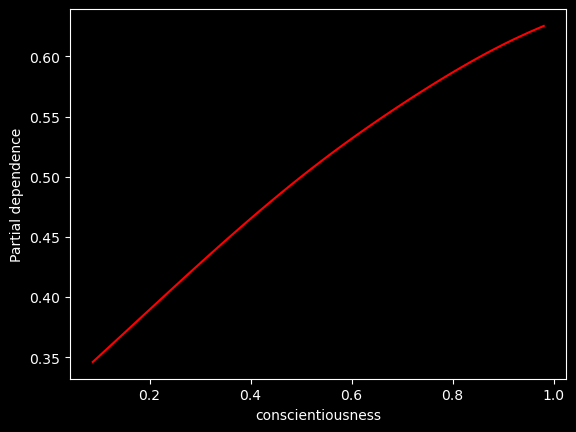

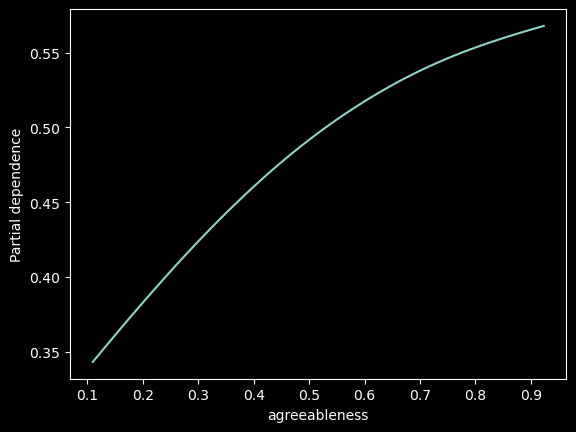

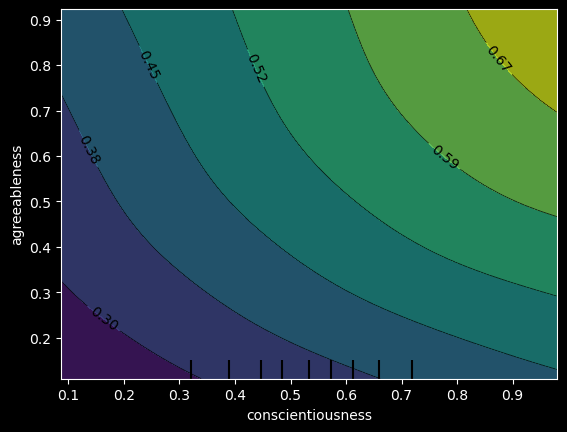

In [18]:
from sklearn.inspection import PartialDependenceDisplay

#Generating the univariate PDP's:
PartialDependenceDisplay.from_estimator(clf, X_test, ['conscientiousness'], line_kw={'color': 'red'})
PartialDependenceDisplay.from_estimator(clf, X_test, ['agreeableness'])

#Generating the bivariate PDP:
PartialDependenceDisplay.from_estimator(clf, X_test, [('conscientiousness', 'agreeableness')])
plt.show()

**Q3.4**

What do these plots show?

> Answer: The first two plots show the impact of conscientiousness and agreeableness on the outcome respectively. They have a similar trend: for both features hold that the higher the feature, the more likely someone is to be interviewed. The agreeableness has more influence when it has a lower value than 0.5 when it has a higher value.
The second plot shows the impact of both conscientiousness and agreeableness (as an interactive pair) on the outcome. As you can see, the factors influence each other: only if a person has both a high conscientiousness score and a high agreeableness score, they are likely to be interviewed. If one of the scores is low, it lowers the total outcome. Just having one high score is not enough. So the plot shows the features interact.


**Q3.5**

Now generate ICE plots for each feature.

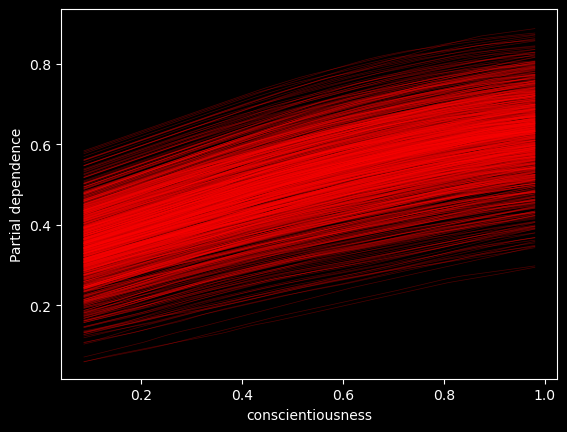

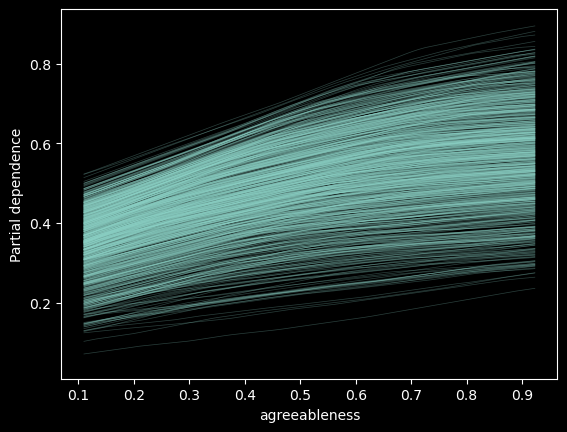

In [19]:
# ICEs
PartialDependenceDisplay.from_estimator(clf, X_test, ['conscientiousness'], kind = 'individual', line_kw={'color': 'red'})
PartialDependenceDisplay.from_estimator(clf, X_test, ['agreeableness'], kind = 'individual')
plt.show()

**Q3.6**

What can you conclude from ICE plots above?

> Answer:  It shows that all the samples react similarly to a change in these features: the likelihood to be interviewed increases when agreeableness and conscientiousness increases for all samples.


**Q3.7**

Implement the PDF (Partial Dependence Function) for univariate analysis of the trained NN model.


In [ ]:
def PDF(X, model, feature):
    
  num_samples = X.shape[0]    # set the number of samples/steps to slice the range of the continuous feature, e.g., 100.
  min_val = X[feature].min()     # minimum value of the given feature
  max_val = X[feature].max()      # maximum value of the given feature
  step_size = (max_val - min_val) / (num_samples)    # see the algorithm in corresponsing lecture slides to calculate the step size as a function of the above variables
  x_values = np.arange(min_val, max_val, step_size)     # x_values at which we will calculate the partial function of the given feature
  f_values = np.zeros(num_samples)   # the calculated partial function values corresponding to x_values

  for k in range(num_samples -1):
        X_temp = X.copy()
        X_temp[feature] = x_values[k] # Set all rows of that feature to this value
        preds = model.predict(X_temp)
        f_values[k] = np.mean(preds)  # Average prediction over all rows
  return x_values, f_values

**Q3.8**

Calculate and visualize the feature importances obtained by your PDF algorithm with a bar graph. How do we calculate the feature importance given the x_values and y_values of the PDF algorithm?

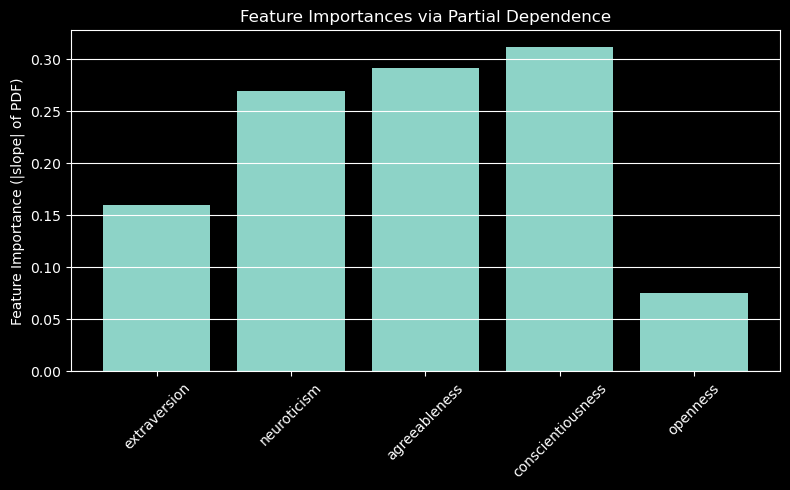

In [21]:
from scipy.stats import linregress

from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

# Feature names
features = ["extraversion", "neuroticism", "agreeableness", "conscientiousness", "openness"]

# Store importances
importances = {}

# Looping over features and compute slopes
for feature in features:
    x_vals, f_vals = PDF(X_val, clf, feature)
    slope, intercept, r_value, p_value, std_err = linregress(x_vals, f_vals) #calculate the slope to give the feature importance
    importances[feature] = abs(slope)  

# Plotting the bar graph
plt.figure(figsize=(8, 5))
plt.bar(importances.keys(), importances.values())
plt.ylabel("Feature Importance (|slope| of PDF)")
plt.title("Feature Importances via Partial Dependence")
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Q3.9**

What are the two most important features obtained by the PDF algorithm for the MLP model? How do these two features compare to the top two features from the Linear Model and the EBM?

> Answer: The results are very similar, like the Linear Regression model, the PDF gives conscientiousness and agreeableness as the top two features. EBM gave conscientiousness and neuroticism, but agreeableness came at a close third, so the result are quite consistent.


### **4. Permutation Feature Importance**

**Q4.1**

Implement the permutation feature importance algorithm using RMSE as the error function. No existing libraries (barring the RMSE from `sklearn` and a function for random sampling / permutation) are allowed to be used, you will implement it yourself with the framework below.

In [22]:
def PFI(X, labels, model, base_rmse):
  results = []

  for feature in X:
    X_temp = X.copy() #Create a copy of X_test
    X_temp[feature] = np.random.permutation(X_temp[feature].values) # Permute the feature column
    y_pred = model.predict(X_temp)    # Predict with the shuffled data    
    rmse = np.sqrt(mean_squared_error(labels, y_pred)) # Calculate the new RMSE
    rmse_dif = abs(base_rmse - rmse)
    results.append((feature, rmse_dif))
    
  results_df = pd.DataFrame(results, columns=["Feature", "Importance"])
  results_df = results_df.sort_values(by="Importance", ascending=False).reset_index(drop=True)

  return results_df

**Q4.2**

Visualize the feature importances obtained by your PFI algorithm with a bar graph.

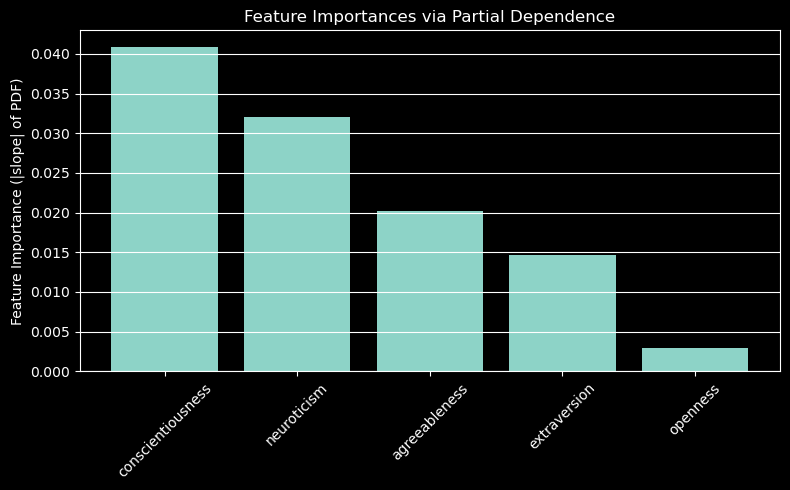

In [23]:
base_pred = clf.predict(X_val)
base_rmse = np.sqrt(mean_squared_error(y_val, base_pred))

# Run permutation feature importance
results_df = PFI(X_val, y_val, clf, base_rmse)

# Plotting the bar graph
plt.figure(figsize=(8, 5))
plt.bar(results_df['Feature'], results_df['Importance'])
plt.ylabel("Feature Importance (|slope| of PDF)")
plt.title("Feature Importances via Partial Dependence")
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Q4.3**

What are the two most important features obtained by the permutation feature importance algorithm for the MLP model? How do these two features compare to the top two features from the Linear Model and the EBM?

> Answer: The PFI algorithm gives conscientiousness and neuroticism as the top two, just like the EBM algorithm. However, the importance of agreeableness has decreased compared to the other models. 